<a href="https://colab.research.google.com/github/AbhinavSharma777/Heart-Disease-Prediction-Using-MAchine-Learning/blob/main/Heart_Disease_Prediction_Using_MAchine_LEarning_ALgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [14]:
type(dataset)

pandas.core.frame.DataFrame

In [15]:
dataset.shape

(303, 14)

In [16]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [21]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [22]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


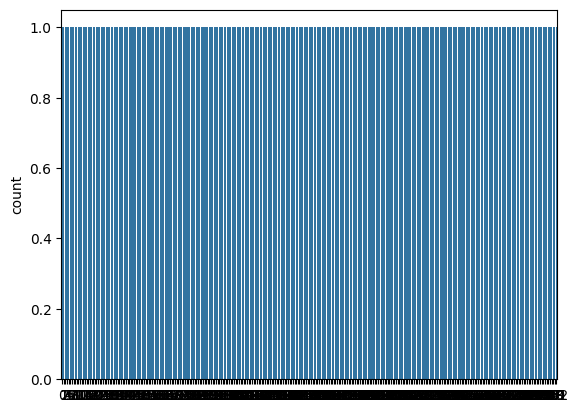

In [23]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [24]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

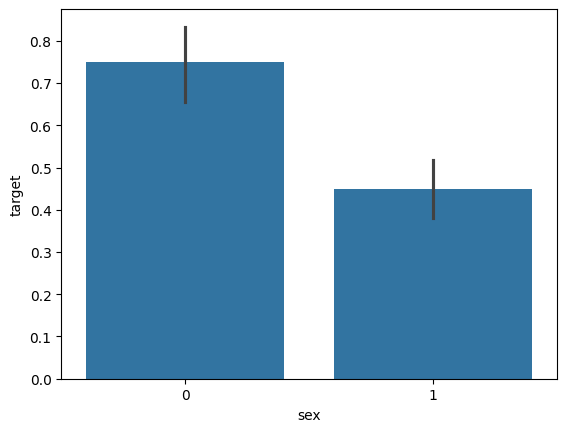

In [26]:
sns.barplot(x="sex", y="target", data=dataset)

In [27]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp'>

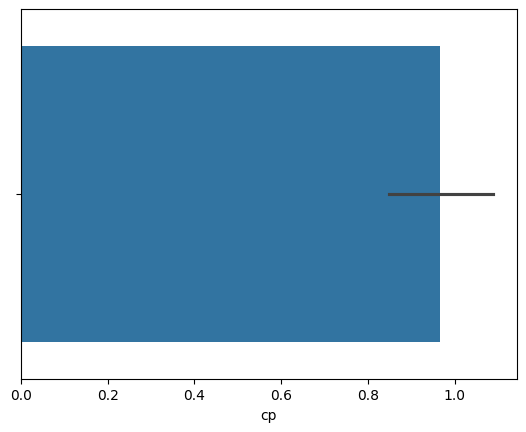

In [29]:
sns.barplot(x="cp", data=dataset)

<Axes: xlabel='cp', ylabel='target'>

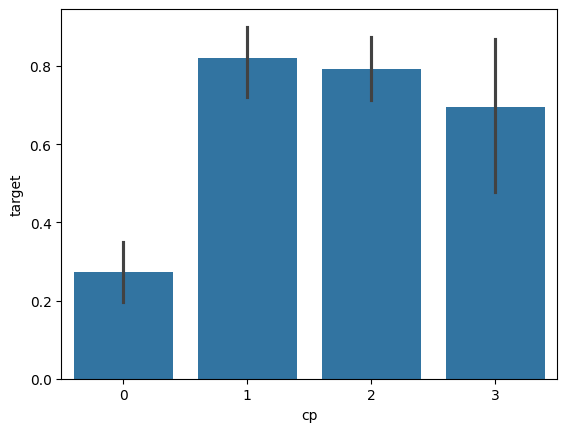

In [30]:
y_series = pd.Series(y)
sns.barplot(x="cp", y=y_series, data=dataset)

<Axes: xlabel='cp', ylabel='target'>

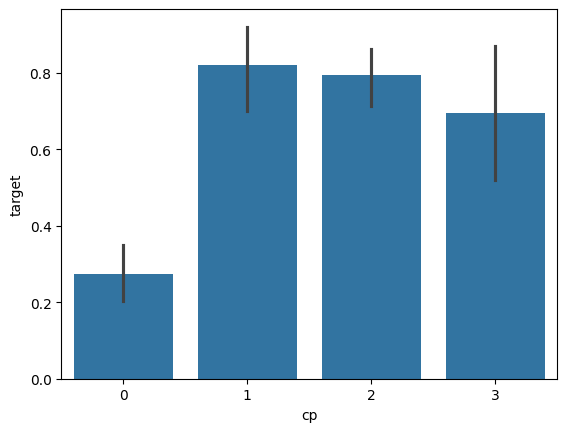

In [32]:
import pandas as pd
import seaborn as sns

y_series = pd.Series(y)

sns.barplot(x="cp", y=y_series, data=dataset)

In [33]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [34]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='fbs'>

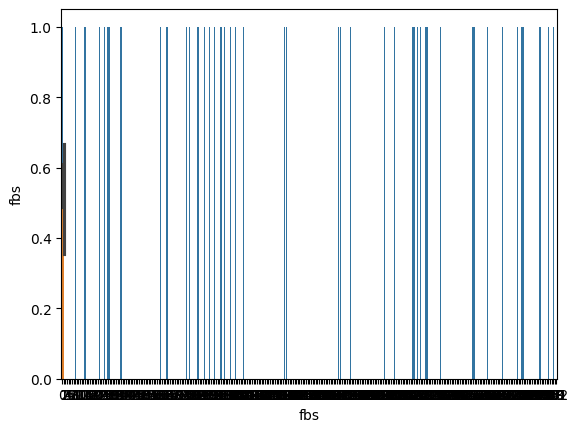

In [36]:
sns.barplot(dataset["fbs"])
sns.barplot(x="fbs", y=y, data=dataset)

In [37]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='restecg'>

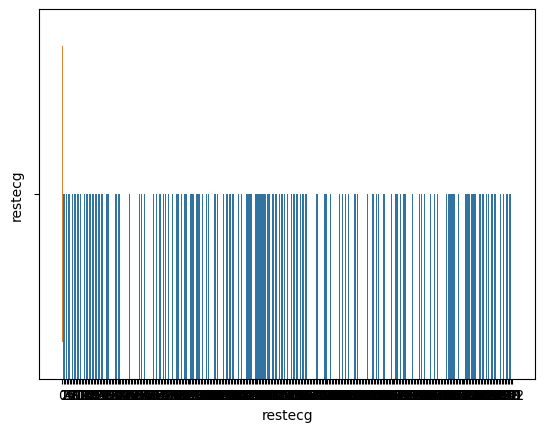

In [39]:
sns.barplot(dataset["restecg"])
sns.barplot(x="restecg", data=dataset)

In [40]:
dataset["exang"].unique()

array([0, 1])

In [41]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [42]:
X_train.shape

(242, 13)

In [43]:
X_test.shape

(61, 13)

In [44]:
Y_train.shape

(242,)

In [45]:
Y_test.shape

(61,)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [48]:
Y_pred_lr.shape

(61,)

In [49]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [50]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [51]:
Y_pred_nb.shape

(61,)

In [52]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [53]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [54]:
Y_pred_svm.shape

(61,)

In [55]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(61,)

In [62]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [63]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(61,)


In [64]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [56]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [57]:
Y_pred_rf.shape

(61,)

In [58]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [59]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape


(61,)

In [60]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [65]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 5ms/step - loss: 17.6659 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 10.3343 - accuracy: 0.5413
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 3.4662 - accuracy: 0.5496
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 1.9699 - accuracy: 0.5744
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 1.9802 - accuracy: 0.5868
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 1.3993 - accuracy: 0.6570
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 1.4507 - accuracy: 0.6364
Epoch 8/300
8/8 [==============================] - 0s 5ms/step - loss: 1.3322 - accuracy: 0.6777
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 1.3490 - accuracy: 0.6653
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 1.2640 - accuracy: 0.6777
Epoch 11/300
8/8 [=========

In [67]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

2/2 [==============================] - 0s 10ms/step


(61, 1)

In [68]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 83.61 %


In [69]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 83.61 %


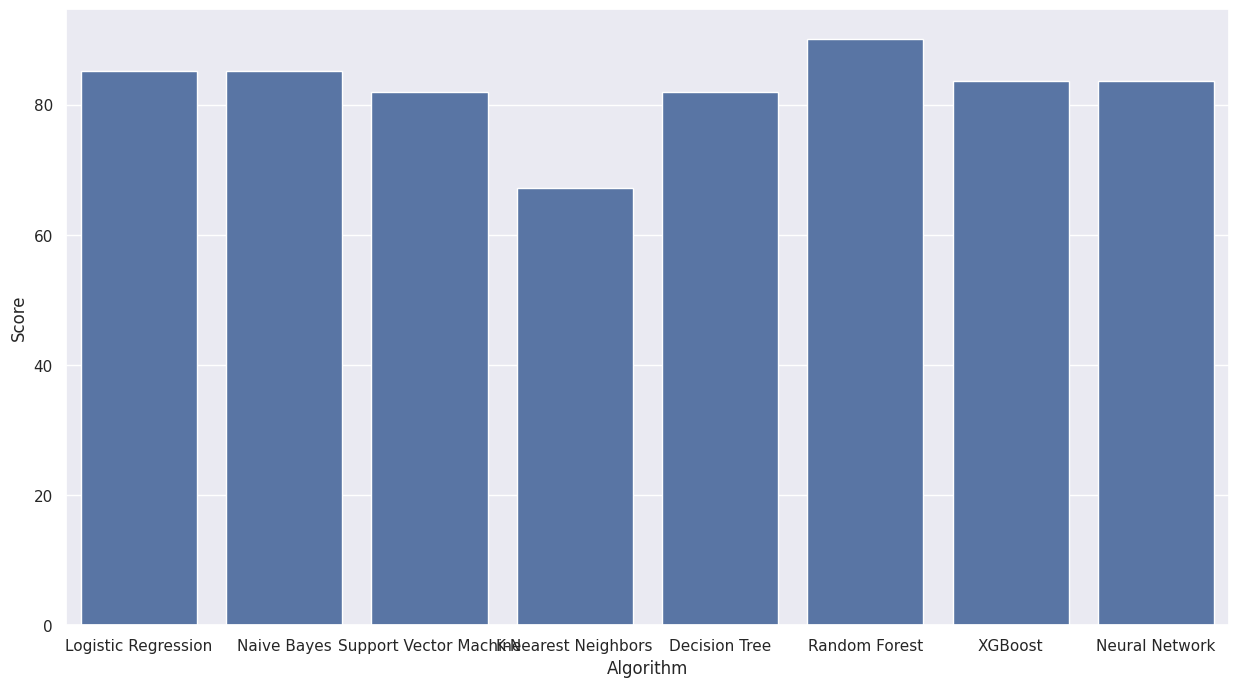

In [77]:
data = {"Algorithm": algorithms, "Score": scores}
df = pd.DataFrame(data)

sns.barplot(data=df, x="Algorithm", y="Score")
plt.show()